# Data visualization

### The aim of this file is to take 2 .csv files, see if some data is missing and select some particular info that we need.

In [2]:
from os import listdir
from os.path import join

listdir('.')

['4_webapi.ipynb',
 '5_website.ipynb',
 '6_financial_data.ipynb',
 '7_advanced_plotting.ipynb',
 '8_altman_z_double_prime.ipynb',
 'Data_Visual.ipynb',
 'mandlebrot.py',
 'Mine_with_comments.ipynb']

In [3]:
listdir('../data')

['athletesfull.csv', 'ElectricVehicle.csv']

Let us rely on 'pandas''s built in `read_csv' function. We import also other libraries that we'll use later on.

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
import numpy as np
import plotly.express as px

import pandas as pd
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'UsecolsArgType' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None,
    keep_default_na: 'bool' = True,
    na_filter: '

Other "read" functions of pandas:

In [5]:
import re
regex = re.compile(r'read')
list(filter(regex.match, dir(pd)))

['read_clipboard',
 'read_csv',
 'read_excel',
 'read_feather',
 'read_fwf',
 'read_gbq',
 'read_hdf',
 'read_html',
 'read_json',
 'read_orc',
 'read_parquet',
 'read_pickle',
 'read_sas',
 'read_spss',
 'read_sql',
 'read_sql_query',
 'read_sql_table',
 'read_stata',
 'read_table',
 'read_xml']

Let us take the 2 .csv files and read them

In [6]:
athlete = pd.read_csv(join('..', 'data', 'athletesfull.csv'))
electric = pd.read_csv(join('..', 'data', 'ElectricVehicle.csv'))

Now we can take the first 5 elements of the file 'athletesfull.csv' \
.head() is 5 by default, but we could also ask the first 3 elements: .head(3)

In [7]:
athlete.head()

,Id,IdAthlete,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Now we can also see the type of the elements in each column

In [8]:
athlete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269630 entries, 0 to 269629
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Id         269630 non-null  int64  
 1   IdAthlete  269630 non-null  int64  
 2   Name       269630 non-null  object 
 3   Sex        269630 non-null  object 
 4   Age        260207 non-null  float64
 5   Height     209744 non-null  float64
 6   Weight     207040 non-null  float64
 7   NOC        269630 non-null  object 
 8   Games      269630 non-null  object 
 9   Year       269630 non-null  int64  
 10  Season     269630 non-null  object 
 11  City       269630 non-null  object 
 12  Sport      269630 non-null  object 
 13  Event      269630 non-null  object 
 14  Medal      39575 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 30.9+ MB


In this file are listed all the participations, so it is normal that some data are missing: \
weight and height: mainly due to the participants at the less recent editions (1896,1900,...) \
Medals: we cannot expect that all the participants won a medal :)

In [9]:
import missingno as msno

With `missingno` library we can get a visual summary of data completeness. We can show the missing values in several ways, for a deeper look into this library, see:\
https://www.kaggle.com/code/selahattinsanli/visualizing-missing-data

<Axes: >

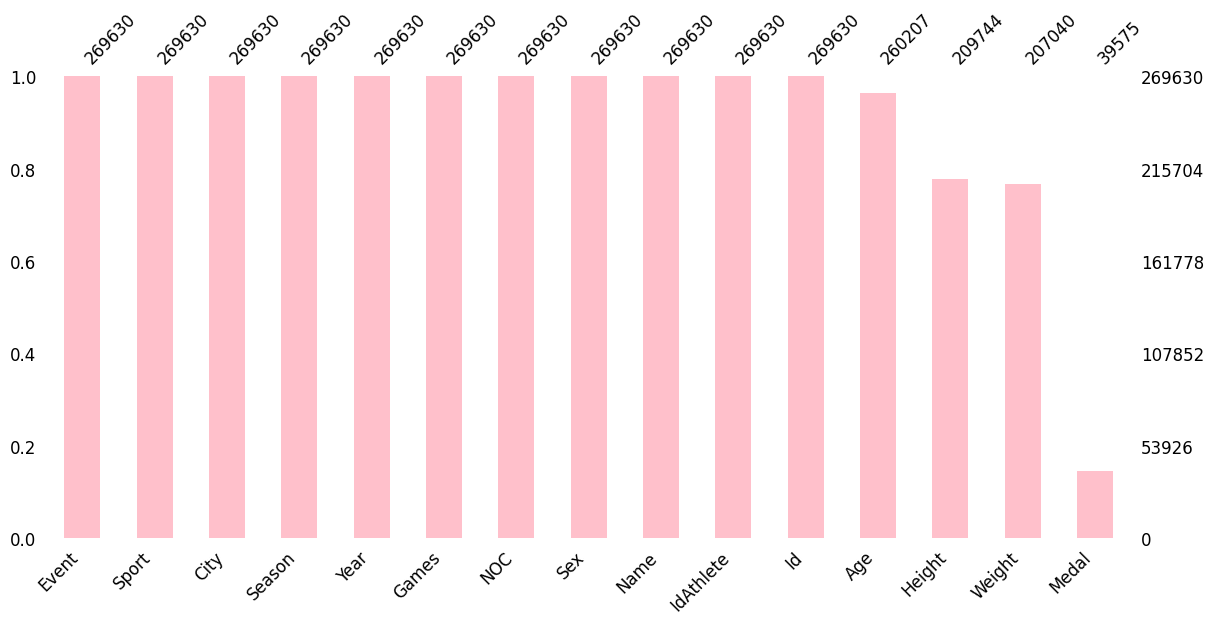

In [10]:
%matplotlib inline
msno.bar(athlete, figsize=(14,6), fontsize=12, color="pink", sort="descending")

We can do the same thing with the other data.

In [11]:
electric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181458 entries, 0 to 181457
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         181458 non-null  object 
 1   County                                             181455 non-null  object 
 2   City                                               181455 non-null  object 
 3   State                                              181458 non-null  object 
 4   Postal Code                                        181455 non-null  float64
 5   Model Year                                         181458 non-null  int64  
 6   Make                                               181458 non-null  object 
 7   Model                                              181458 non-null  object 
 8   Electric Vehicle Type                              181458 non-null  object

We can see a summary of the table (the firsts and the lasts entries). This database comes from kaggle.com

In [12]:
electric

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181453,50EA1TEA7P,Douglas,East Wenatchee,WA,98802.0,2023,LUCID,AIR,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,12.0,244207316,POINT (-120.28674 47.4176),PUD NO 1 OF DOUGLAS COUNTY,5.301795e+10
181454,1C4JJXP60N,Spokane,Spokane Valley,WA,99206.0,2022,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,4.0,207180774,POINT (-117.24549 47.6534),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10
181455,5YJ3E1EA0M,King,Enumclaw,WA,98022.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,161934202,POINT (-121.98953 47.20347),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
181456,5YJ3E1EC8L,Clark,Vancouver,WA,98682.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,18.0,100859650,POINT (-122.5286031 45.6686601),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10


<Axes: >

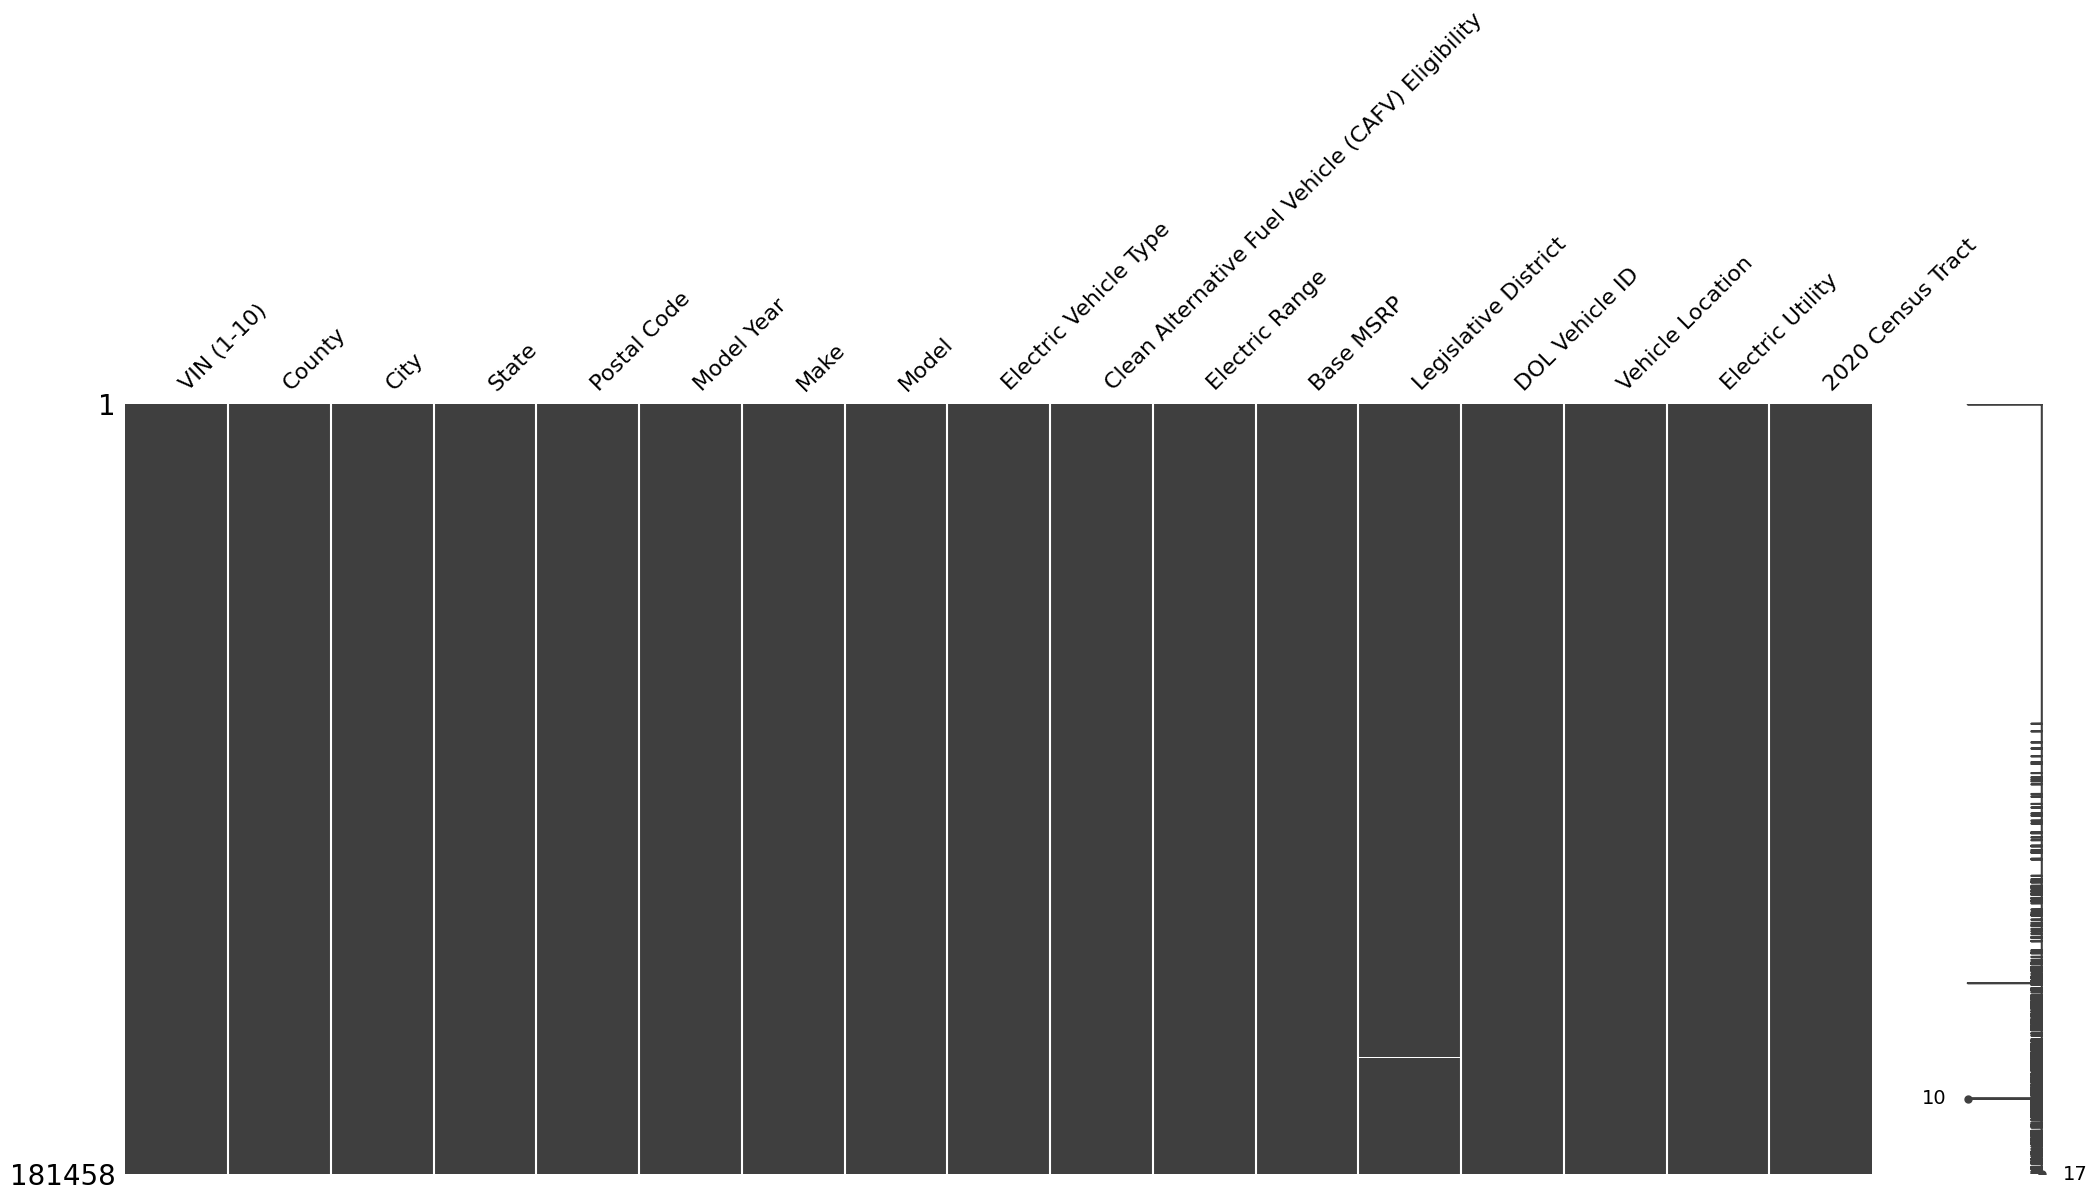

In [13]:
msno.matrix(electric)

This time the completeness is almost 100%. The sparkline on the right shows the completeness of the data.

We can come back to the olympics db and try to find out how many competition saw the participation of an italian athlete.\
If in the same competition there were 2+ italian athletes, we will have 2+ rows (we count the participations, not the event)

In [14]:
athlete[athlete['NOC'] == 'ITA']

,Id,IdAthlete,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal
158,159,62,Giovanni Abagnale,M,21.0,198.0,90.0,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
197,198,91,Emanuele Abate,M,27.0,190.0,80.0,ITA,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 110 metres Hurdles,NaN
198,199,92,Ignazio Abate,M,21.0,180.0,73.0,ITA,2008 Summer,2008,Summer,Beijing,Football,Football Men's Football,NaN
214,215,103,Silvano Abba,M,25.0,NaN,NaN,ITA,1936 Summer,1936,Summer,Berlin,Modern Pentathlon,Modern Pentathlon Men's Individual,Bronze
218,219,106,Agostino Abbagnale,M,22.0,188.0,96.0,ITA,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Quadruple Sculls,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268546,268547,134352,Silvia Zennaro,F,26.0,168.0,72.0,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Sailing,Sailing Women's One Person Dinghy,NaN
268569,268570,134364,Luciano Zerbini,M,24.0,194.0,115.0,ITA,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Men's Discus Throw,NaN
268570,268571,134364,Luciano Zerbini,M,32.0,194.0,115.0,ITA,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's Shot Put,NaN
268571,268572,134364,Luciano Zerbini,M,32.0,194.0,115.0,ITA,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's Discus Throw,NaN


Well, almost 1 partecipation out of 27 were of italians (for the USA the fraction is almost the double)

Now we can find other things, like:\
The youngest athlete (the athletes for which the age is NULL will be automatically excluded)\
The heavier athlete in the first edition\
The oldest italian athlete in the 2002 edition\
'iloc[i]' means the i-th row in the list, starting from 0.\
 '|' represents 'or', while '&' represents 'and'.

In [15]:
youngest = athlete.sort_values('Age', ascending=True).iloc[0]
heavyfirstedition = athlete.sort_values(['Year', 'Weight'], ascending=[True, False]).iloc[0]
oldestita2002 = athlete[(athlete['NOC'] == 'ITA') & (athlete['Year'] == 2002)].sort_values('Age', ascending=False).iloc[0]

In [16]:
print(f'youngest: \n{youngest}\n\n')
print(f'Heaviest in the first edition: \n{heavyfirstedition}\n\n')
print(f'Oldest italian in 2002: \n{oldestita2002}\n\n')

youngest: 
Id                                          142880
IdAthlete                                    71691
Name                            Dimitrios Loundras
Sex                                              M
Age                                           10.0
Height                                         NaN
Weight                                         NaN
NOC                                            GRE
Games                                  1896 Summer
Year                                          1896
Season                                      Summer
City                                        Athina
Sport                                   Gymnastics
Event        Gymnastics Men's Parallel Bars, Teams
Medal                                       Bronze
Name: 142879, dtype: object


Heaviest in the first edition: 
Id                              53219
IdAthlete                       27318
Name            Dimitrios Deligiannis
Sex                                 M
Age       

Let's do some more practical things with this data, like finding the 10 athletes with the highest number of medals won. (here we need to group the athletes and count their medals)

In [17]:
winners = athlete.groupby(['IdAthlete', 'Name']).count()['Medal'].nlargest(10)
winners = pd.DataFrame(winners).reset_index()
winners

,IdAthlete,Name,Medal
0,94406,Michael Fred Phelps II,28
1,67046,Larysa Semenivna Latynina (Diriy ),18
2,4198,Nikolay Yefimovich Andrianov,15
3,11951,Ole Einar Bjrndalen,13
4,74420,Edoardo Mangiarotti,13
5,89187,Takashi Ono,13
6,109161,Borys Anfiyanovych Shakhlin,13
7,23426,Natalie Anne Coughlin ( Hall),12
8,35550,Birgit Fischer Schmidt,12
9,57998,Sawao Kato,12


# We can now plot some data.

We start with two 2D graphs:\
We start with the total number of Medals each season. There are 2 plots, one for winter games and the other for summer games.\
Note that the total number of medal is higher than the one reported officially: In our db the medals are assigned to each winner, so if officially a basketball team wins a medal, in our db, this is reflected not in a medal, but in 8 medals (are 8 the number of players in a team?), one for each member of the team.


The needed libraries here are 'pd' and 'plt'

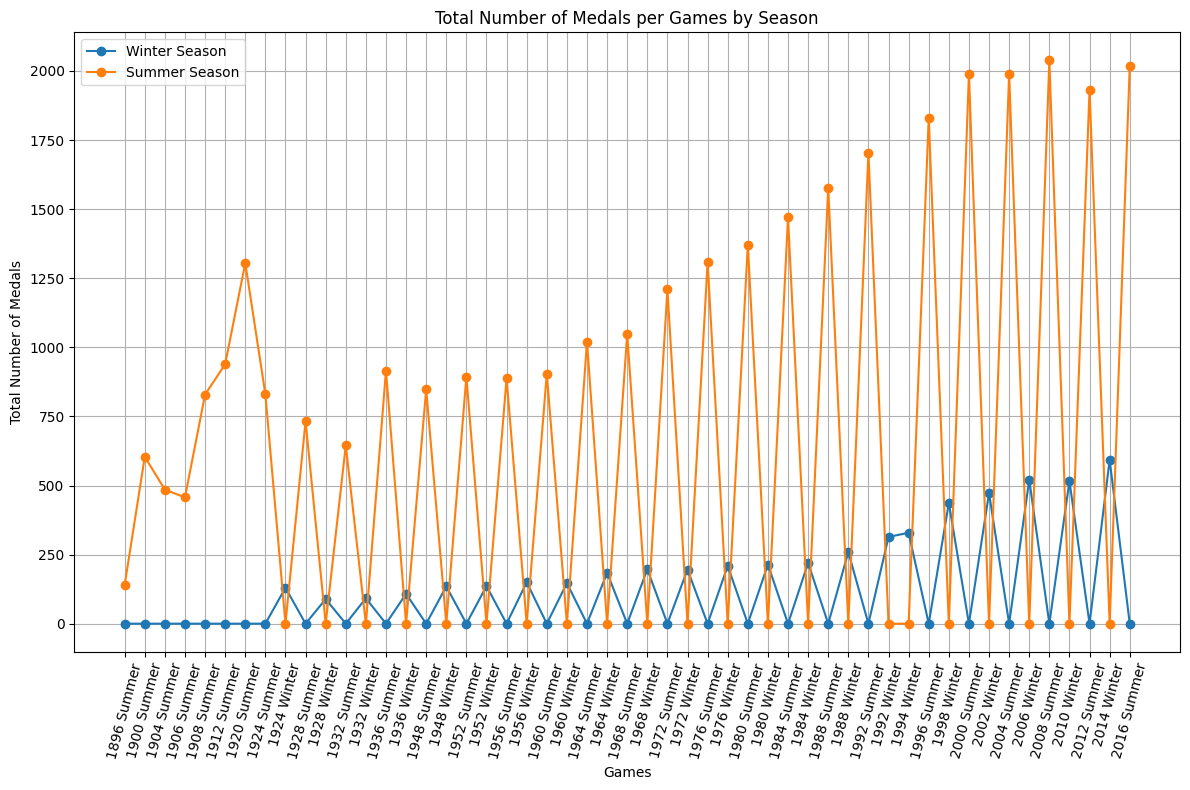

In [29]:
df = athlete

medals_df = df[df['Medal'].notnull()]

medals_by_games_season = medals_df.groupby(['Games', 'Season']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
plt.plot(medals_by_games_season.index, medals_by_games_season['Winter'], label='Winter Season', marker='o')
plt.plot(medals_by_games_season.index, medals_by_games_season['Summer'], label='Summer Season', marker='o')
plt.xlabel('Games')
plt.ylabel('Total Number of Medals')
plt.title('Total Number of Medals per Games by Season')
plt.xticks(rotation=75)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Same libraries here\
Here notice than some countries appear more times under different names: Germany (GER, FRG), Russia (RUS, URS) as examples

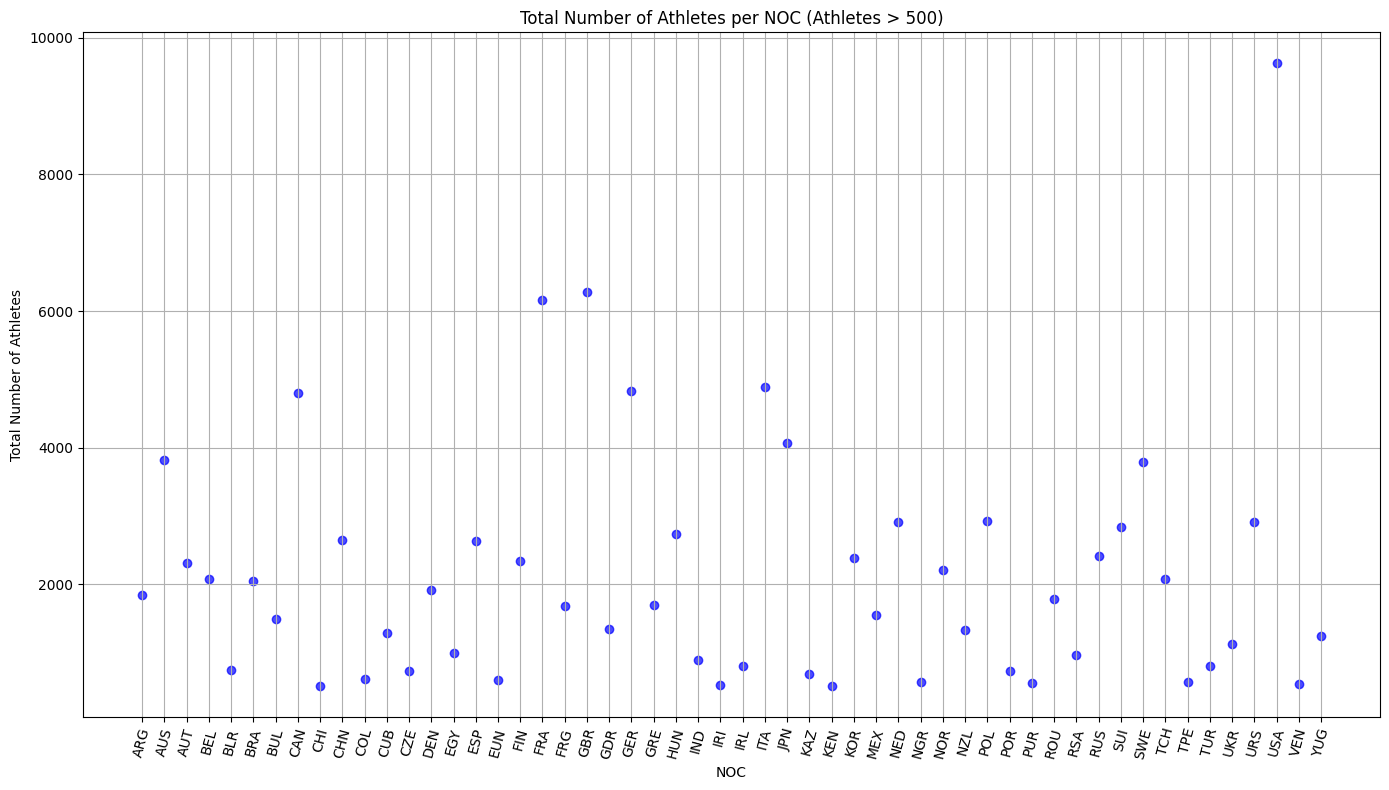

In [33]:
df = athlete

athletes_per_noc = df.groupby('NOC')['IdAthlete'].nunique().reset_index()
athletes_per_noc.columns = ['NOC', 'DistinctAthletes']
filtered_athletes_per_noc = athletes_per_noc[athletes_per_noc['DistinctAthletes'] > 500]
plt.figure(figsize=(14, 8))
plt.scatter(filtered_athletes_per_noc['NOC'], filtered_athletes_per_noc['DistinctAthletes'], color='blue', alpha=0.7)
plt.xlabel('NOC')
plt.ylabel('Total Number of Athletes')
plt.title('Total Number of Athletes per NOC (Athletes > 500)')
plt.xticks(rotation=75)
plt.grid(True)
plt.tight_layout()
plt.show()

### Now 3D plots
We start with a plot showing if in an year, a medal was won by a competitor of a country.\
Libraries: pd, plt, mathplotlib (Axes3D), sklearn (LabelEncoder). This last is needed to encode the value of the country 'NOC' as a number.

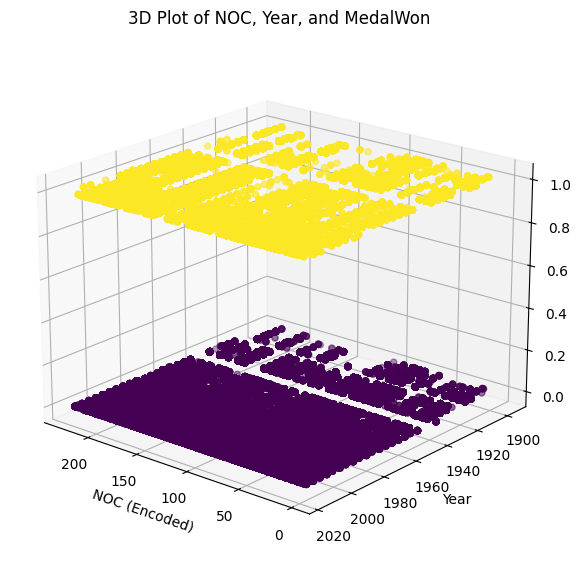

In [34]:
df = athlete

label_encoder = LabelEncoder()
df['NOC_encoded'] = label_encoder.fit_transform(df['NOC'])
df['MedalWon'] = df['Medal'].notnull().astype(int)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['NOC_encoded'], df['Year'], df['MedalWon'], c=df['MedalWon'], cmap='viridis', marker='o')
ax.set_xlabel('NOC (Encoded)')
ax.set_ylabel('Year')
ax.set_zlabel('MedalWon')
ax.set_title('3D Plot of NOC, Year, and MedalWon')
ax.view_init(elev=20, azim=130)
plt.show()

Yes, the last graph was not so clear, but it is a good example on how to encode a list of values that is a string.\
Let us now plot the number of medals by year and NOC, without encoding.\
Libraries: pd, plt, Axes3D, np

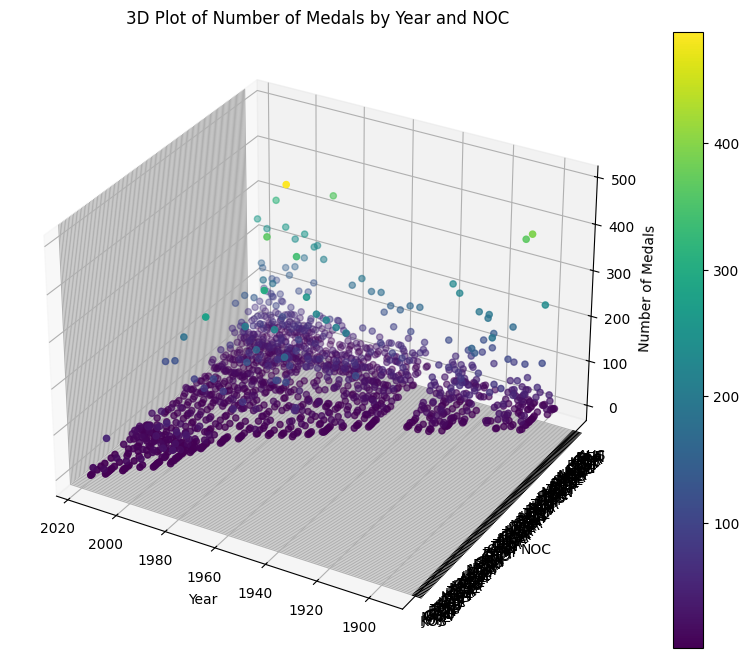

In [35]:
df = athlete

medals_df = df[df['Medal'].notnull()]
medals_count = medals_df.groupby(['Year', 'NOC']).size().reset_index(name='MedalCount')
noc_mapping = {noc: i for i, noc in enumerate(medals_count['NOC'].unique())}
medals_count['NOC_numeric'] = medals_count['NOC'].map(noc_mapping)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(medals_count['Year'], medals_count['NOC_numeric'], medals_count['MedalCount'], 
                c=medals_count['MedalCount'], cmap='viridis', marker='o')
ax.set_xlabel('Year')
ax.set_ylabel('NOC')
ax.set_zlabel('Number of Medals')
ax.set_title('3D Plot of Number of Medals by Year and NOC')
ax.set_yticks(list(noc_mapping.values()))
ax.set_yticklabels(list(noc_mapping.keys()))
ax.view_init(elev=30, azim=120)
plt.colorbar(sc)
plt.show()


Not so clear? too many countries? Then maybe let's change the type of graph.\
Libraries:pd, px

In [36]:
df = athlete
medals_df = df[df['Medal'].notnull()]
medals_count = medals_df.groupby(['Year', 'NOC']).size().reset_index(name='MedalCount')
fig = px.scatter_3d(
    medals_count,
    x='Year',
    y='NOC',
    z='MedalCount',
    color='MedalCount',
    labels={'Year': 'Year', 'NOC': 'NOC', 'MedalCount': 'Number of Medals'},
    title='3D Plot of Number of Medals by Year and NOC'
)
fig.show()


We can use numpy to do another graph: a 3D plot of number of medals by year and season (the 3D version of the plot done before)

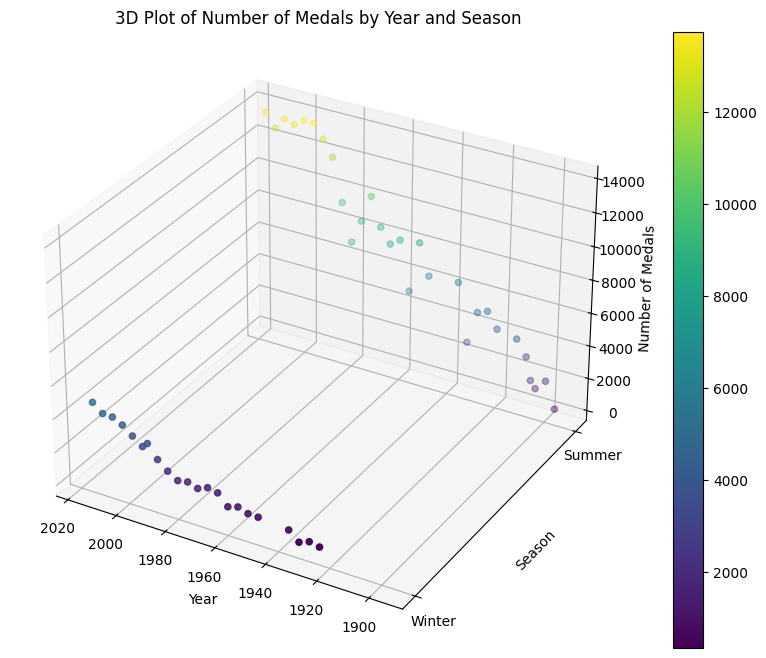

In [37]:
df = athlete

sport_df = df[df['Sport'].notnull()]
sport_count = sport_df.groupby(['Year', 'Season']).size().reset_index(name='SportCount')
season_mapping = {Season: i for i, Season in enumerate(sport_count['Season'].unique())}
sport_count['Season_numeric'] = sport_count['Season'].map(season_mapping)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(sport_count['Year'], sport_count['Season_numeric'], sport_count['SportCount'], 
                c=sport_count['SportCount'], cmap='viridis', marker='o')
ax.set_xlabel('Year')
ax.set_ylabel('Season')
ax.set_zlabel('Number of Medals')
ax.set_title('3D Plot of Number of Medals by Year and Season')
ax.set_yticks(list(season_mapping.values()))
ax.set_yticklabels(list(season_mapping.keys()))
ax.view_init(elev=30, azim=120)
plt.colorbar(sc)
plt.show()
